# Monte Carlo Solver

Birth and Death of Photons in a Cavity

In [26]:
# Importing libraries
import numpy as np
from qutip import about, basis, destroy, mcsolve, mesolve
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from ipywidgets import interact, FloatSlider
# Global plot style settings
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "mathtext.fontset": "cm",            # Use Computer Modern for math
    "font.size": 14,                     # Base font size
    "axes.labelsize": 16,                # Axis label font size
    "axes.titlesize": 16,                # Title font size
    "legend.fontsize": 13,               # Legend font size
    "xtick.labelsize": 13,               # X tick label size
    "ytick.labelsize": 13,               # Y tick label size
    "axes.linewidth": 1.2,               # Thicker axis lines
    "xtick.direction": "in",             # x-yick direction
    "ytick.direction": "in",             # y-tick direction
    "xtick.top": True,                   # Ticks on top
    "ytick.right": True,                 # Ticks on right
    "text.usetex": False,                # Enable LaTeX if needed
    "figure.dpi": 150,                   # Good resolution for screens
    "savefig.dpi": 300                   # High resolution for saving
})

In [18]:
# Define function for nice plotting
def PlotSettings(ax, gridlines=False, minimalist=False):

    # Minimalist style
    if minimalist:
        # Hide top and right spines (borders)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Ticks only on bottom and left
        ax.tick_params(which='both', top=False, right=False)
    else:
        # Minor ticks
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        # Tick parameters
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='major', length=7, width=1.2)
        ax.tick_params(which='minor', length=4, width=1)
    # Optional grid
    if gridlines:
        ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
        ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)

In [ ]:
N = 5               # number of Fock states
a = destroy(N)      # Annihilation operator
H = a.dag() * a     # Hamiltonian
psi0 = basis(N, 1)  # Initial Fock state with one photon

kappa = 1.0 / 0.129 # Coupling rate to heat bath
nth = 0.063         # Temperature with <n>=0.063

# collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())

In [20]:
ntraj = [1, 10, 50, 1000]  # number of MC trajectories
mc = []  # MC results
tlist = np.linspace(0, 0.8, 100)

# Solve using MCSolve for different ntraj
for n in ntraj:
    result = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a], ntraj=n)
    mc.append(result)
me = mesolve(H, psi0, tlist, c_ops, [a.dag() * a])

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:   0.00s
10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.00s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.01s. Est. time left: 00:00:00:00
50.0%. Run time:   0.02s. Est. time left: 00:00:00:00
60.0%. Run time:   0.02s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.0%. Run time:   0.03s. Est. time left: 00:00:00:00
90.0%. Run time:   0.03s. Est. time left: 00:00:00:00
100.0%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.05s
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.03s. Est. time left: 00:00:00:00
40.0%. Run time:   0.05s. Est. time left: 00:00:00:00
50.0%. Run time:   0.06s. Est. time left: 00:00:00:00
60.0%. Run time:   0.07s. Est. time left: 00:00:00:00
70.0%. Run time:   0.08s. Est. t

Text(0.5, 0, 'Time (s)')

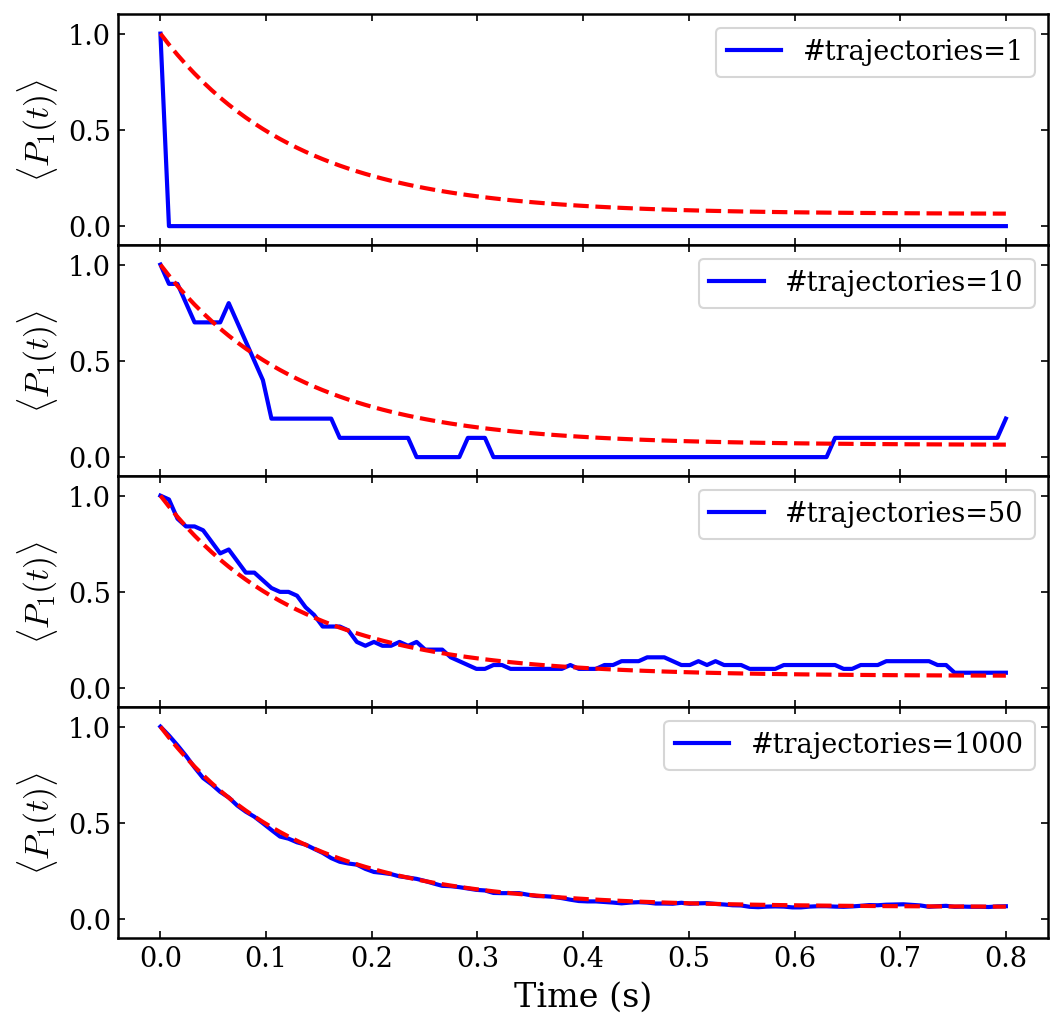

In [25]:
fig = plt.figure(figsize=(8, 8), frameon=False)
plt.subplots_adjust(hspace=0.0)

for i in range(len(ntraj)):
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(
        tlist, mc[i].expect[0], "b", lw=2,
        label="#trajectories={}".format(ntraj[i])
    )
    ax.plot(tlist, me.expect[0], "r--", lw=2)
    ax.set_yticks([0, 0.5, 1])
    ax.set_ylim([-0.1, 1.1])
    ax.set_ylabel(r"$\langle P_{1}(t)\rangle$")
    ax.legend(loc="upper right")
    #PlotSettings(ax)

ax.set_xlabel(r"Time (s)")

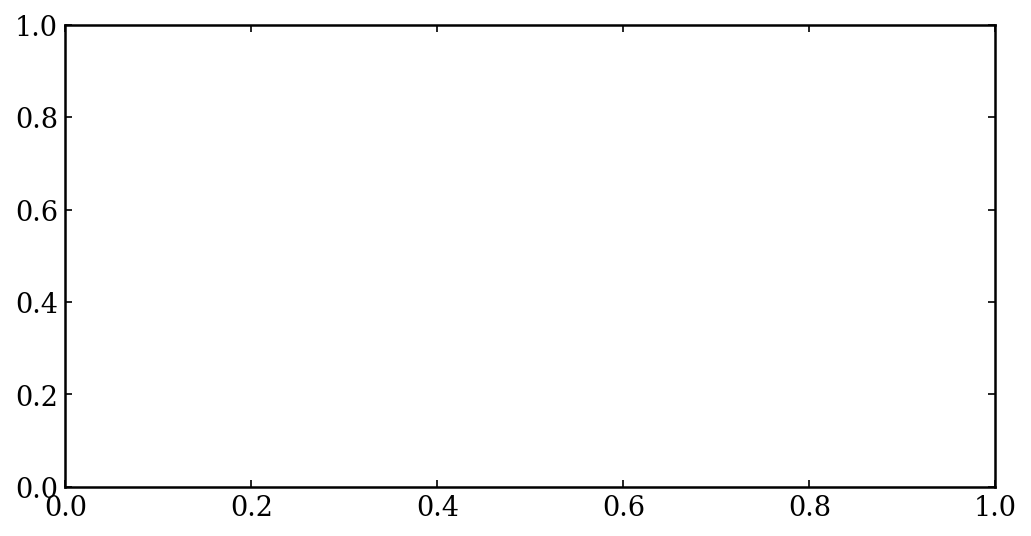

interactive(children=(FloatSlider(value=1.0, description='T (K)', min=1.0, step=1.0), FloatSlider(value=1.0, d…

<function __main__.update(T=1, kappa=1, n=10)>

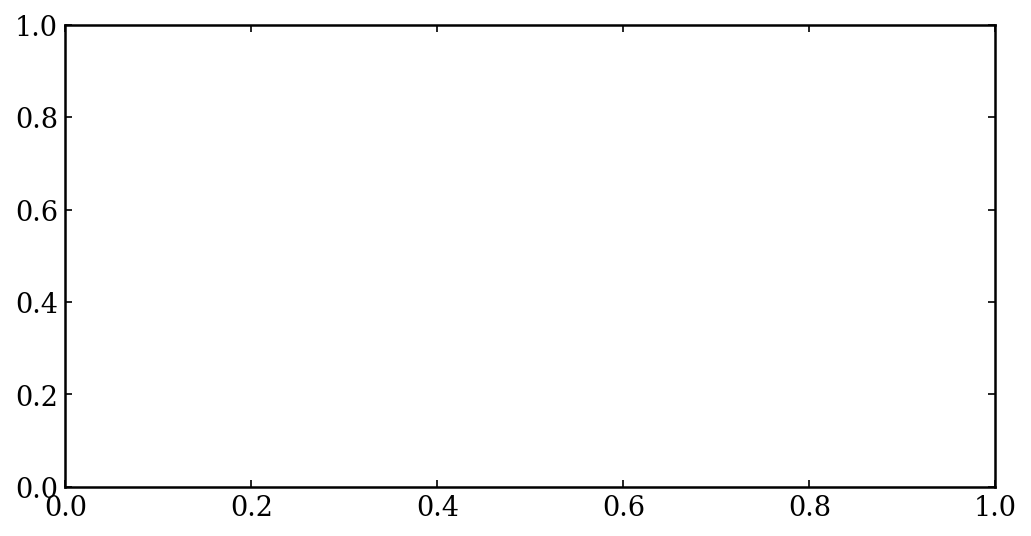

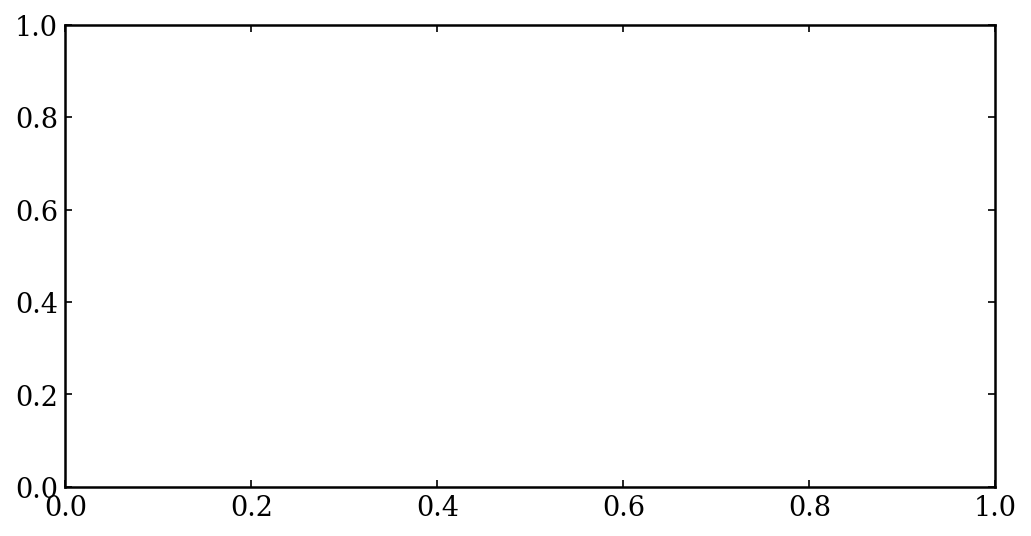

In [29]:
# Run this for interactive sliders
# Update function for interactive plotting
def update(T=1, kappa=1, n=10):

    N = 5                       # number of Fock states
    a = destroy(N)              # Annihilation operator
    H = a.dag() * a             # Hamiltonian
    psi0 = basis(N, 1)          # Initial Fock state with one photon
    nth = 1/(np.exp(1/T) - 1)   # Average photon number <n>

    # collapse operators for the thermal bath
    c_ops = []
    c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
    c_ops.append(np.sqrt(kappa * nth) * a.dag())

    result = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a], ntraj=int(n))

    # Plotting
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111)
    ax.plot(tlist, result)
    plt.tight_layout()
    plt.show()
# Sliders
interact(
    update,
    T=FloatSlider(min=1, max=100, step=1, value=1, description="T (K)"),
    kappa=FloatSlider(min=0.01, max=10, step=0.01, value=1, description=r"$\kappa$"),
    n=FloatSlider(min=1, max=1000, step=1, value=10, description="ntraj")
)